# The possible impact of weather on crimes in Amsterdam

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load data

You can put your data at the same directory as the notebook file and then use `pandas` to load the data.

In [2]:
df = pd.read_csv("merged_weather_misdrijven_monthly_v3.csv")
df

,year_month,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,3.5.2 Onder invloed (weg),3.5.5 Weg (overig),3.6.4 Aantasting openbare orde,3.7.1 Discriminatie,3.7.2 Vreemdelingenzorg,3.7.4 Cybercrime,3.9.1 Horizontale fraude,3.9.2 Verticale fraude,3.9.3 Fraude (overig),Totaal misdrijven
0,2012-01,217.580645,58.709677,63.387097,89.032258,11.258065,36.451613,10.354839,136.129032,12.290323,...,228.0,48.0,90.0,4.0,21.0,3.0,108.0,7.0,211.0,8466.0
1,2012-02,194.551724,48.482759,51.448276,75.517241,11.655172,25.862069,11.965517,114.827586,11.206897,...,198.0,29.0,78.0,4.0,12.0,7.0,118.0,3.0,236.0,7374.0
2,2012-03,209.096774,33.709677,39.064516,60.645161,11.483871,18.709677,7.838710,92.903226,11.419355,...,305.0,31.0,116.0,4.0,14.0,16.0,147.0,9.0,272.0,8645.0
3,2012-04,190.233333,44.700000,50.700000,80.333333,11.833333,22.333333,7.866667,125.666667,13.100000,...,235.0,27.0,102.0,3.0,21.0,10.0,155.0,6.0,230.0,8143.0
4,2012-05,181.548387,37.258065,44.193548,68.064516,12.935484,18.709677,9.000000,110.322581,12.354839,...,237.0,28.0,101.0,6.0,20.0,4.0,136.0,6.0,256.0,8333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2024-12,197.096774,53.322581,58.451613,79.354839,12.000000,34.193548,8.870968,128.387097,12.612903,...,256.0,72.0,107.0,8.0,5.0,30.0,451.0,1.0,2.0,6871.0
156,2025-01,219.774194,41.129032,46.645161,74.516129,11.483871,20.645161,11.161290,117.096774,11.258065,...,190.0,78.0,126.0,5.0,4.0,52.0,457.0,2.0,5.0,6021.0
157,2025-02,130.678571,40.464286,44.178571,62.857143,8.571429,23.928571,9.535714,100.357143,11.035714,...,216.0,82.0,119.0,7.0,10.0,34.0,438.0,3.0,2.0,5824.0
158,2025-03,159.193548,31.516129,36.516129,57.419355,11.935484,16.451613,9.580645,88.709677,11.806452,...,244.0,100.0,123.0,4.0,8.0,38.0,442.0,1.0,6.0,6232.0


### Bicycle Theft vs. Maximum Temperature

_Slight increase in thefts when it's warmer._

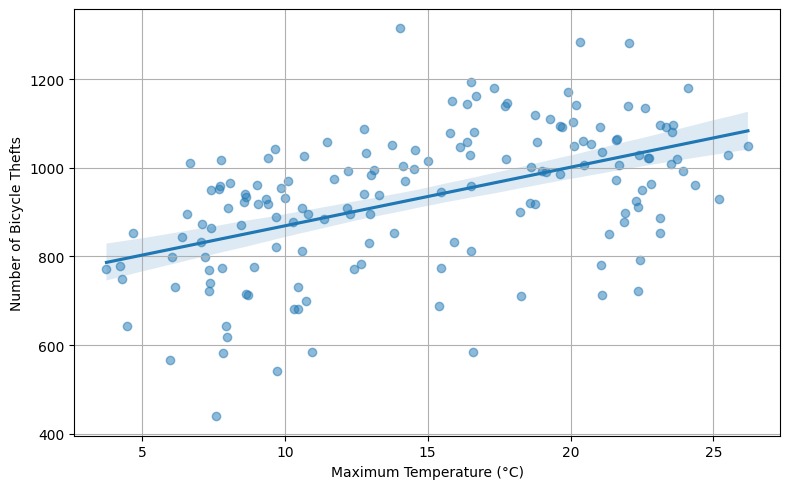


This scatterplot shows the relationship between monthly maximum temperature (°C) 
and the number of bicycle thefts reported in the Netherlands. Each point represents one month. 
The blue regression line indicates a slight upward trend: bicycle thefts appear to increase 
when temperatures are higher. A possible explanation is that warmer weather encourages 
more cycling and more bikes being left outside, creating more opportunities for theft.


In [3]:
df.columns = df.columns.str.strip()
df['TX'] = df['TX'] / 10  # TX is in tienden van °C
df['TG'] = df['TG'] / 10  # TG is in tienden van °C
display(Markdown("### Bicycle Theft vs. Maximum Temperature"))
display(Markdown("_Slight increase in thefts when it's warmer._"))

# 📈 Plot maken
plt.figure(figsize=(8, 5))
sns.regplot(
    x='TX',
    y='1.2.3 Diefstal van brom-, snor-, fietsen',
    data=df,
    scatter_kws={'alpha': 0.5}
)
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Number of Bicycle Thefts")
plt.grid(True)
plt.tight_layout()
plt.show()

# Uitleg onder de plot
caption = """
This scatterplot shows the relationship between monthly maximum temperature (°C) 
and the number of bicycle thefts reported in the Netherlands. Each point represents one month. 
The blue regression line indicates a slight upward trend: bicycle thefts appear to increase 
when temperatures are higher. A possible explanation is that warmer weather encourages 
more cycling and more bikes being left outside, creating more opportunities for theft.
"""
display(Markdown(caption))


### Weather vs. Water-Related Influence Reports

_Higher temperature and evaporation coincide with more 'under influence on boat' incidents._

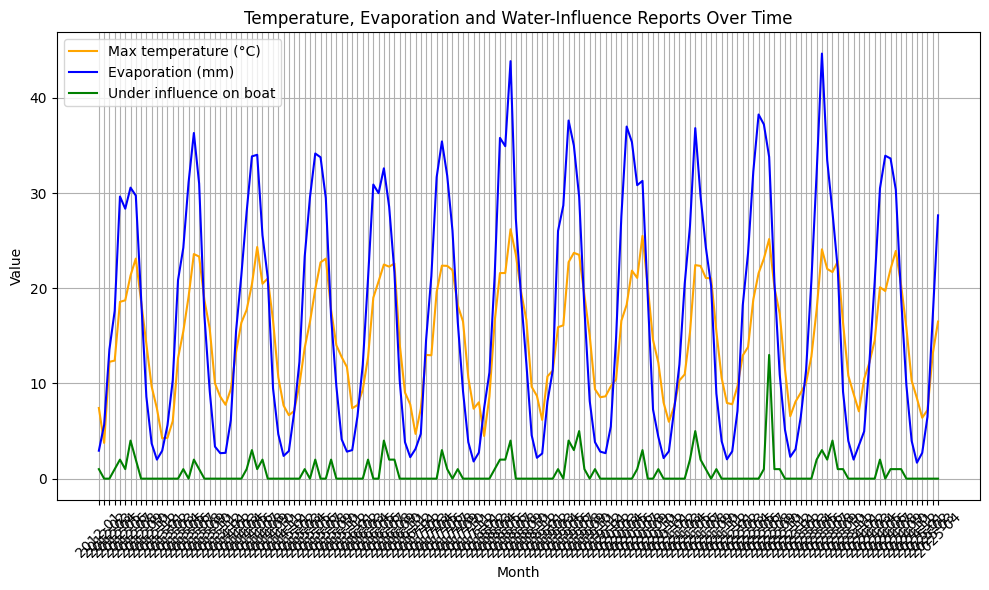


This multivariate line chart compares maximum temperature (°C), evaporation (mm), and the number of 
water-related incidents involving substance use (“under influence on water”) across months. 
The x-axis shows the months, while the y-axis reflects the respective values. The orange line shows 
temperature trends, blue shows evaporation, and green represents incident reports. The plot reveals that 
months with higher temperature and evaporation also see more such incidents. This pattern suggests 
that warm and dry conditions may encourage recreational activity on water, potentially increasing risky behavior.


In [4]:
# Titel en korte take-away boven de plot
display(Markdown("### Weather vs. Water-Related Influence Reports"))
display(Markdown("_Higher temperature and evaporation coincide with more 'under influence on boat' incidents._"))

# 📈 Lijnplot maken
plt.figure(figsize=(10, 6))
plt.plot(df['year_month'], df['TX'], label='Max temperature (°C)', color='orange')
plt.plot(df['year_month'], df['EV24'], label='Evaporation (mm)', color='blue')
plt.plot(df['year_month'], df['3.4.2 Onder invloed (water)'], label='Under influence on boat', color='green')

plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Temperature, Evaporation and Water-Influence Reports Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Caption onder de plot
caption = """
This multivariate line chart compares maximum temperature (°C), evaporation (mm), and the number of 
water-related incidents involving substance use (“under influence on water”) across months. 
The x-axis shows the months, while the y-axis reflects the respective values. The orange line shows 
temperature trends, blue shows evaporation, and green represents incident reports. The plot reveals that 
months with higher temperature and evaporation also see more such incidents. This pattern suggests 
that warm and dry conditions may encourage recreational activity on water, potentially increasing risky behavior.
"""
display(Markdown(caption))


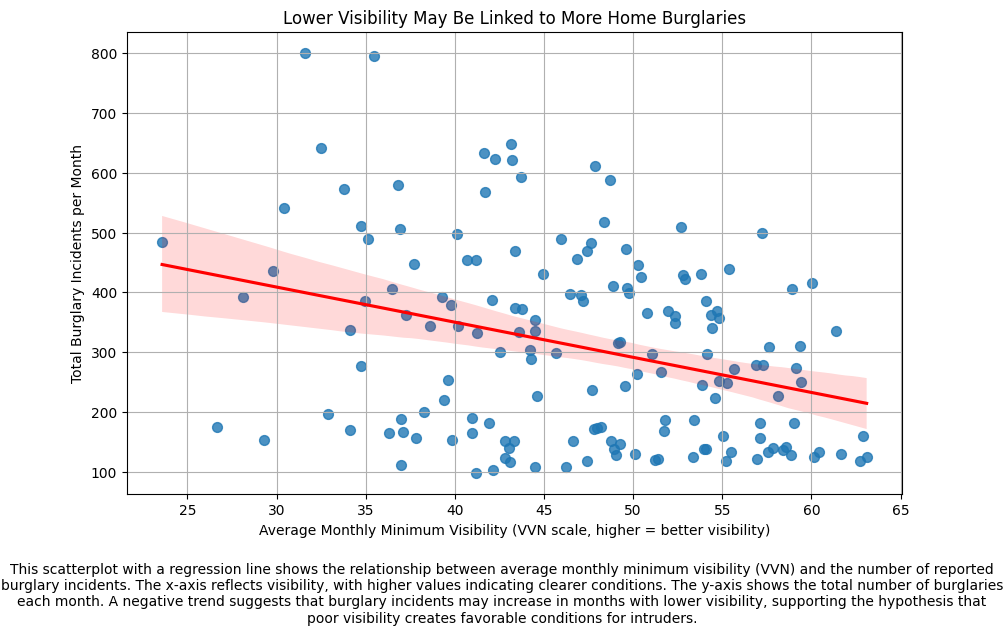

In [5]:
plt.figure(figsize=(10,6))

sns.regplot(data=df, x='VVN', y='1.1.1 Diefstal/inbraak woning', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('Lower Visibility May Be Linked to More Home Burglaries')

plt.xlabel('Average Monthly Minimum Visibility (VVN scale, higher = better visibility)')
plt.ylabel('Total Burglary Incidents per Month')

plt.grid(True)

caption = (
    "This scatterplot with a regression line shows the relationship between average monthly minimum visibility "
    "(VVN) and the number of reported burglary incidents. The x-axis reflects visibility, with higher values indicating clearer conditions. "
    "The y-axis shows the total number of burglaries each month. A negative trend suggests that burglary incidents may increase "
    "in months with lower visibility, supporting the hypothesis that poor visibility creates favorable conditions for intruders."
)

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


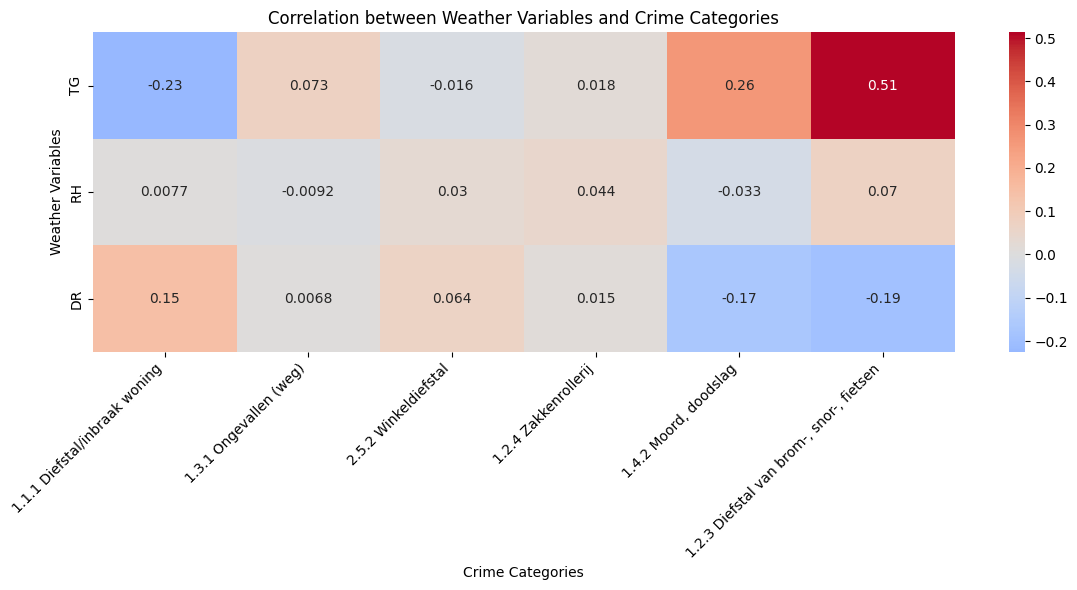

In [6]:
weer_vars = ['TG', 'RH', 'DR']
misdaad_vars = [
    '1.1.1 Diefstal/inbraak woning',
    '1.3.1 Ongevallen (weg)',
    '2.5.2 Winkeldiefstal',
    '1.2.4 Zakkenrollerij',
    '1.4.2 Moord, doodslag',
    '1.2.3 Diefstal van brom-, snor-, fietsen'
]

# Maak subset dataframe met weer en misdaad kolommen
df_subset = df[weer_vars + misdaad_vars]

# Bereken correlatie matrix
corr_matrix = df_subset.corr()

# Selecteer alleen correlaties tussen weer_vars (rijen) en misdaad_vars (kolommen)
corr_submatrix = corr_matrix.loc[weer_vars, misdaad_vars]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(corr_submatrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Variables and Crime Categories')
plt.xlabel('Crime Categories')
plt.ylabel('Weather Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


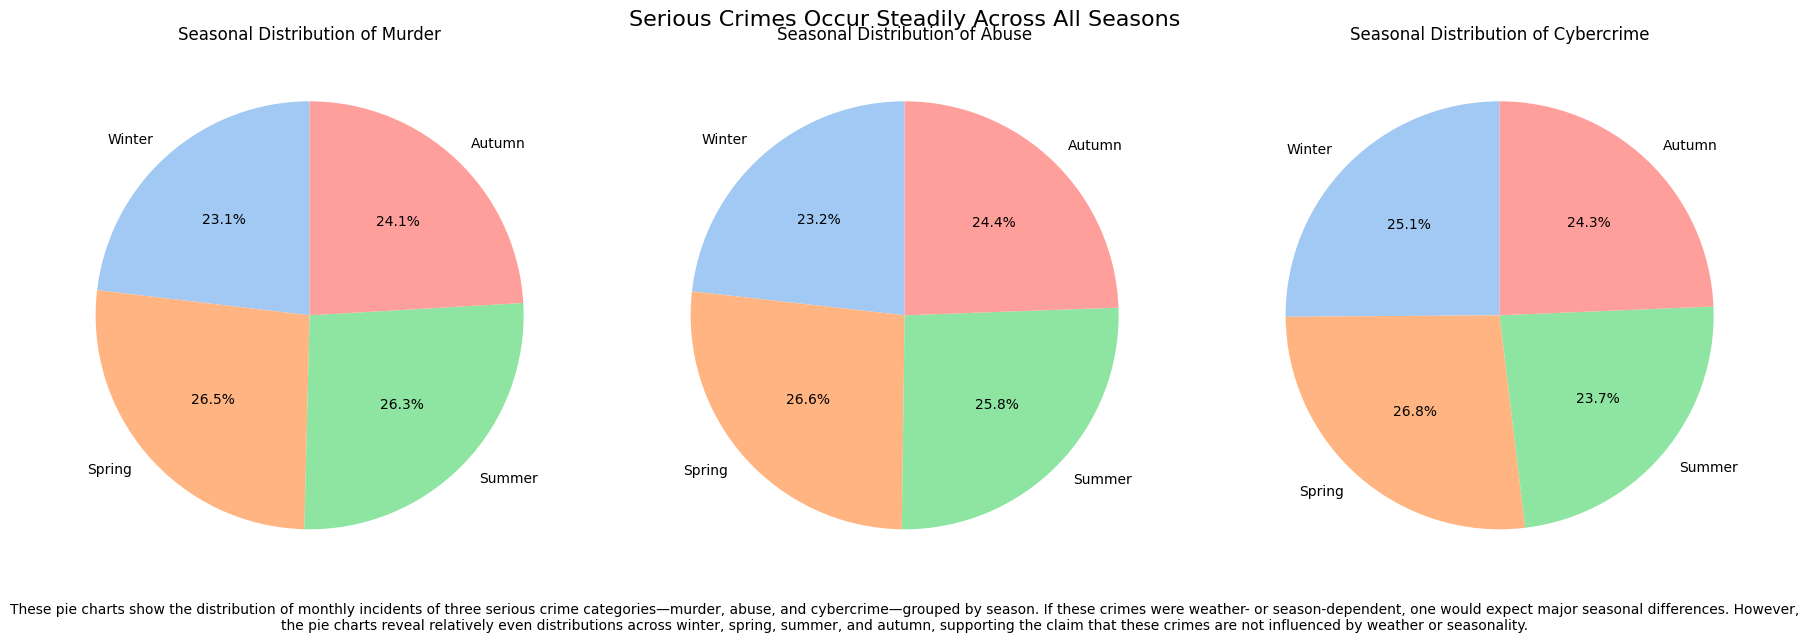

In [7]:
# Map each month number to a season
season_map = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Extract numeric month from 'year_month' and map to season
df['month'] = pd.to_datetime(df['year_month']).dt.month
df['Season'] = df['month'].map(season_map)

# Serious crime columns and their display names
serious_crimes = {
    '1.4.2 Moord, doodslag': 'Murder',
    '1.4.5 Mishandeling': 'Abuse',
    '3.7.4 Cybercrime': 'Cybercrime'
}

# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (col, label) in zip(axes, serious_crimes.items()):
    # Total incidents per season for each crime
    season_totals = df.groupby('Season')[col].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

    # Pie chart
    ax.pie(
        season_totals,
        labels=season_totals.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel")[0:4]
    )
    ax.set_title(f'Seasonal Distribution of {label}')

# Title and caption
fig.suptitle('Serious Crimes Occur Steadily Across All Seasons', fontsize=16)

caption = (
    "These pie charts show the distribution of monthly incidents of three serious crime categories—murder, abuse, and cybercrime—"
    "grouped by season. If these crimes were weather- or season-dependent, one would expect major seasonal differences. However, the pie charts "
    "reveal relatively even distributions across winter, spring, summer, and autumn, supporting the claim that these crimes are not influenced by weather or seasonality."
)

plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

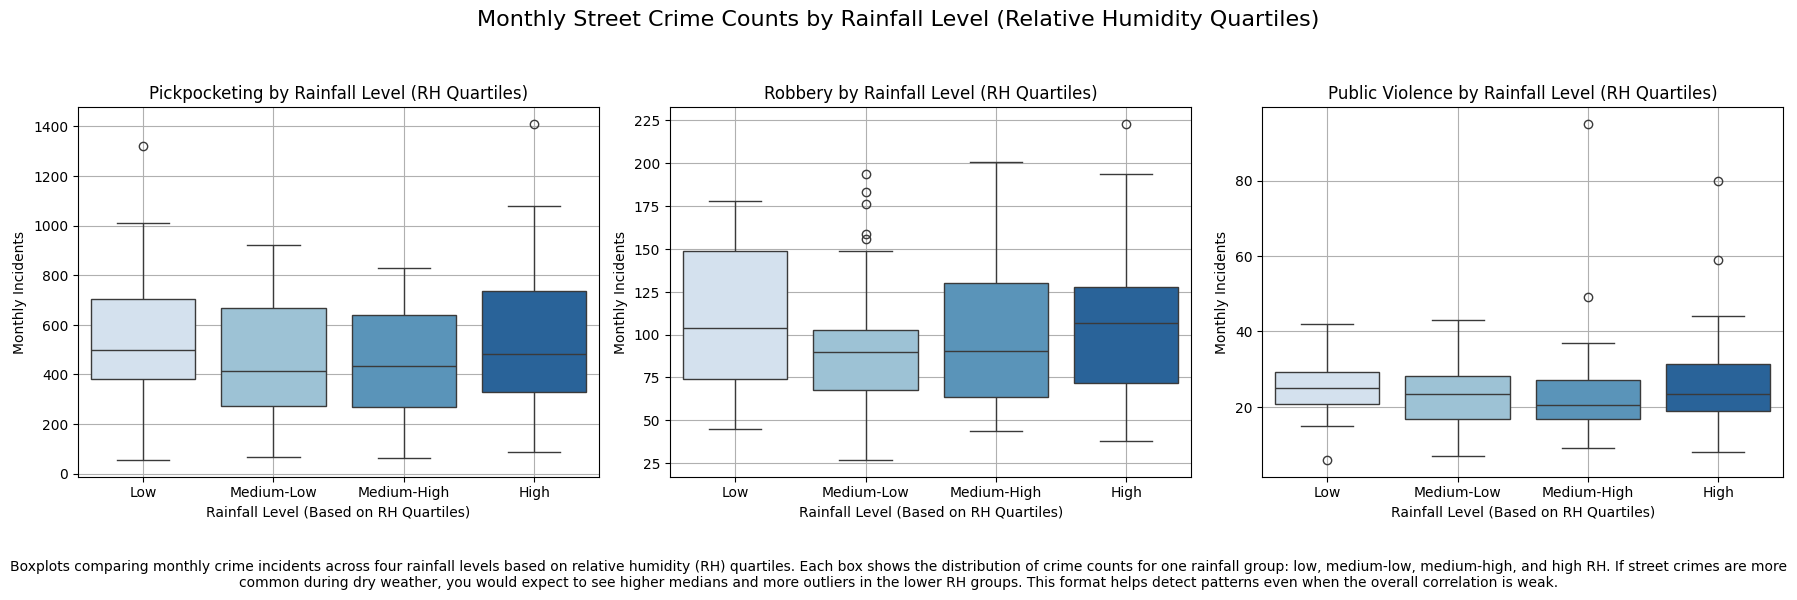

In [8]:
# Create RH quartiles (low to high rainfall)
df['Rainfall_Level'] = pd.qcut(df['RH'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Set up figure
crime_columns = {
    '1.2.4 Zakkenrollerij': 'Pickpocketing',
    '1.4.6 Straatroof': 'Robbery',
    '1.4.3 Openlijk geweld (persoon)': 'Public Violence'
}

plt.figure(figsize=(18, 5))

for i, (col, label) in enumerate(crime_columns.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Rainfall_Level', y=col, hue='Rainfall_Level', palette='Blues', legend=False)
    plt.title(f'{label} by Rainfall Level (RH Quartiles)')
    plt.xlabel('Rainfall Level (Based on RH Quartiles)')
    plt.ylabel('Monthly Incidents')
    plt.grid(True)

plt.suptitle('Monthly Street Crime Counts by Rainfall Level (Relative Humidity Quartiles)', fontsize=16, y=1.05)

caption = (
    "Boxplots comparing monthly crime incidents across four rainfall levels based on relative humidity (RH) quartiles. "
    "Each box shows the distribution of crime counts for one rainfall group: low, medium-low, medium-high, and high RH. "
    "If street crimes are more common during dry weather, you would expect to see higher medians and more outliers in the lower RH groups. "
    "This format helps detect patterns even when the overall correlation is weak."
)

plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import FloatSlider, VBox, interactive_output

crime_columns = {
    'Pickpocketing': '1.2.4 Zakkenrollerij',
    'Robbery': '1.4.6 Straatroof',
    'Public violence': '1.4.3 Openlijk geweld (persoon)',
    'Under influence on boat': '3.4.2 Onder invloed (water)'
}

def plot_multiple_crimes(temp):
    lower = temp - 0.5
    upper = temp + 0.5

    filtered = df[(df['TX'] >= lower) & (df['TX'] < upper)]

    percentages = []
    for label, col in crime_columns.items():
        total = df[col].sum()
        count_at_temp = filtered[col].sum()
        percentage = (count_at_temp / total) * 100 if total > 0 else 0
        percentages.append((label, percentage))

    fig = go.Figure()

    for label, percentage in percentages:
        fig.add_trace(go.Bar(
            x=[label],
            y=[percentage],
            name=label,
            text=f"{percentage:.2f}%",
            textposition='auto'
        ))

    fig.update_layout(
        height=550,
        margin=dict(t=140, b=60),
        yaxis_title="Percentage of Total Incidents",
        xaxis_title="Crime Type",
        yaxis_range=[0, 15],

        # Title + subtitle via annotations
        annotations=[
            dict(
                text="Crime Distribution by Temperature Range",
                xref='paper', yref='paper',
                x=0.5, y=1.15,
                showarrow=False,
                font=dict(size=22, color='black'),
                xanchor='center', yanchor='bottom'
            ),
            dict(
                text="Crime patterns vary with temperature, but no clear linear trend emerges for most crimes, exceptions exist: under influence on boat for example.",
                xref='paper', yref='paper',
                x=0.5, y=1.08,
                showarrow=False,
                font=dict(size=14, color='gray'),
                xanchor='center', yanchor='bottom'
            )
        ]
    )

    fig.show()

temperature_slider = FloatSlider(value=20, min=5, max=26.5, step=0.5, description='Temp (°C)')

out = interactive_output(plot_multiple_crimes, {'temp': temperature_slider})

VBox([out, temperature_slider])
